In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# test
test_images = np.load('../masterdata_test/masterdata_images_test.npy')
test_labels = np.load('../masterdata_test/masterdata_target_test.npy')
test_lat = np.load('../masterdata_test/masterdata_lat_test.npy')
test_lon = np.load('../masterdata_test/masterdata_lon_test.npy')
test_time = np.load('../masterdata_test/masterdata_time_test.npy')

print(np.shape(test_images))

# train
train_images = np.load('../masterdata_train/masterdata_images_train.npy')
train_labels = np.load('../masterdata_train/masterdata_target_train.npy')
train_lat = np.load('../masterdata_train/masterdata_lat_train.npy')
train_lon = np.load('../masterdata_train/masterdata_lon_train.npy')
train_time = np.load('../masterdata_train/masterdata_time_train.npy')


(26508, 2, 27, 27)


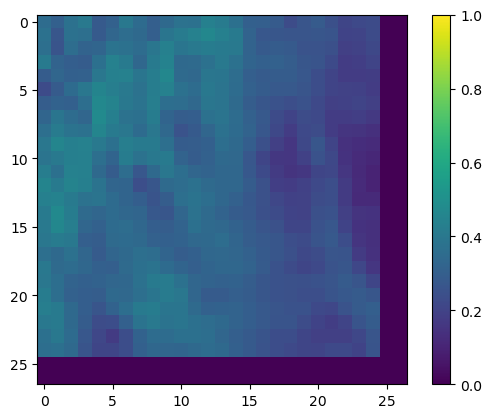

In [11]:
plt.imshow(test_images[15][1],vmin=0,vmax=1)
plt.colorbar()

In [14]:
def filter_dataset_clouds(images,lat,lon,target,time):
    # number of pixels above 0.3 per image

    num_pixel_high = np.where(images[:,0,:,:]>0.3,1,0).sum(axis=(1,2))
    #print(num_pixel_high)

    percentage_pixel_high = num_pixel_high/(np.where(images[:,0,:,:]>0,1,0).sum(axis=(1,2)))
    #print(percentage_pixel_high)

    # find indices of images with more than 75% of pixels above 0.4
    indices = np.where(percentage_pixel_high>0.75)
    #print(np.shape(indices))

    # percentage of images with more than 75% of pixels above 0.4
    percentage_remove =np.shape(indices)[1]/np.shape(images)[0]
    print('percentage of dataset to be removed',percentage_remove)

    # remove images with more than 75% of pixels above 0.4
    images = np.delete(images,indices,axis=0)
    lat = np.delete(lat,indices)
    lon = np.delete(lon,indices)
    target = np.delete(target,indices)
    time = np.delete(time,indices)

    return images,lat,lon,target,time

In [15]:
nocloud_images_test,nocloud_lat_test,nocloud_lon_test,nocloud_target_test,nocloud_time_test = filter_dataset_clouds(test_images,test_lat,test_lon,test_labels,test_time)
nocloud_images_train,nocloud_lat_train,nocloud_lon_train,nocloud_target_train,nocloud_time_train = filter_dataset_clouds(train_images,train_lat,train_lon,train_labels,train_time)

C:\Users\Yongxing\AppData\Local\Temp\ipykernel_14716\3191845039.py:7: RuntimeWarning: invalid value encountered in divide
  percentage_pixel_high = num_pixel_high/(np.where(images[:,0,:,:]>0,1,0).sum(axis=(1,2)))


percentage of dataset to be removed 0.09465067149539762
percentage of dataset to be removed 0.09437218821620907


In [185]:
np.save('../master_data_noclouds_test/masterdata_images_test.npy',nocloud_images_test)
np.save('../master_data_noclouds_test/masterdata_target_test.npy',nocloud_target_test)
np.save('../master_data_noclouds_test/masterdata_lat_test.npy',nocloud_lat_test)
np.save('../master_data_noclouds_test/masterdata_lon_test.npy',nocloud_lon_test)
np.save('../master_data_noclouds_test/masterdata_time_test.npy',nocloud_time_test)

np.save('../master_data_noclouds_train/masterdata_images_train.npy',nocloud_images_train)
np.save('../master_data_noclouds_train/masterdata_target_train.npy',nocloud_target_train)
np.save('../master_data_noclouds_train/masterdata_lat_train.npy',nocloud_lat_train)
np.save('../master_data_noclouds_train/masterdata_lon_train.npy',nocloud_lon_train)
np.save('../master_data_noclouds_train/masterdata_time_train.npy',nocloud_time_train)


C:\Users\Yongxing\AppData\Local\Temp\ipykernel_14716\333727066.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar


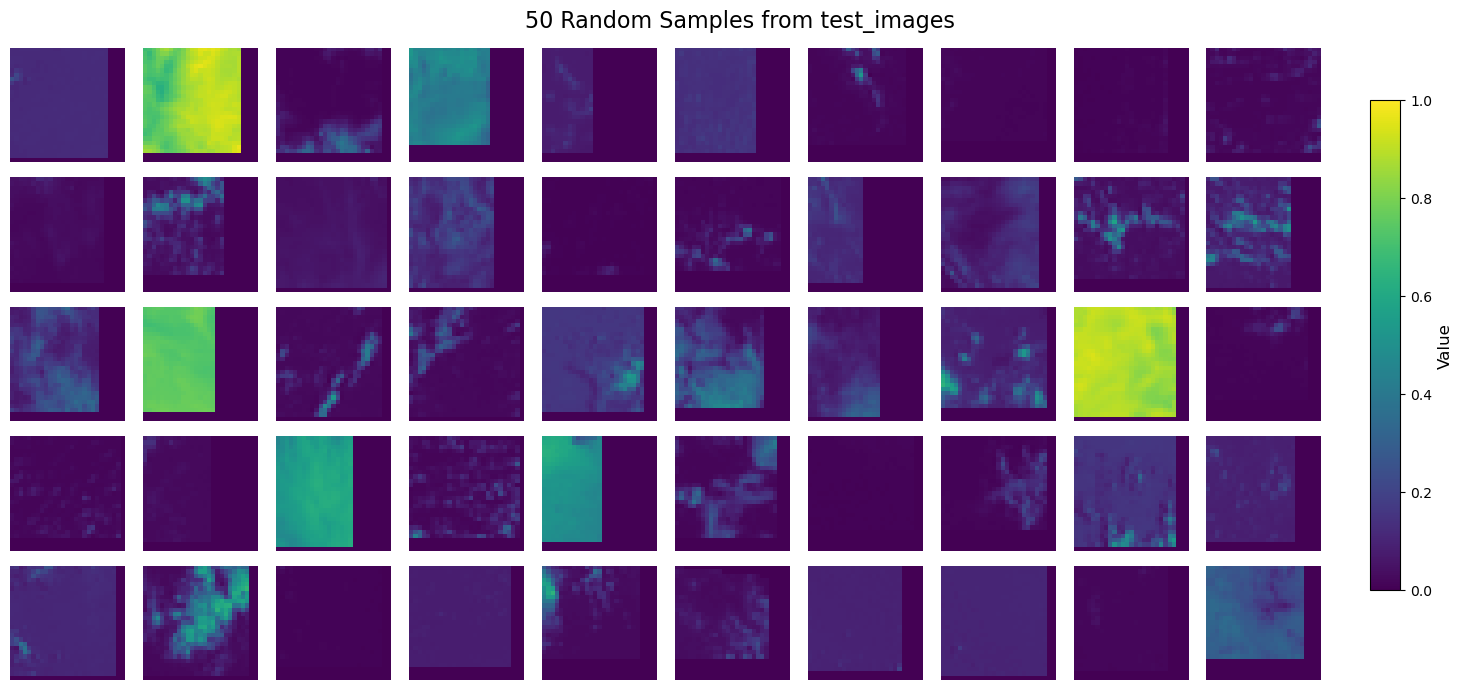

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming test_images is an array-like structure where each element is structured as [image_data, metadata].
# Generating 50 random samples
num_samples = 50
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
random_samples = [test_images[i][1] for i in random_indices]

# Set up the plot grid
rows = 5
cols = 10
fig, axes = plt.subplots(rows, cols, figsize=(15, 7))
fig.suptitle("50 Random Samples from test_images", fontsize=16)

# Plot each sample
for idx, ax in enumerate(axes.flat):
    if idx < len(random_samples):
        ax.imshow(random_samples[idx], vmin=0, vmax=1, cmap='viridis')
        ax.axis('off')
    else:
        ax.axis('off')  # Hide any unused subplot

# Add a colorbar for the entire figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust as needed
norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Value", fontsize=12)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar
plt.show()
